In [1]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\narp -10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2,os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical


import shutil
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path =  r'C:\Users\NARP -10\Desktop\neethuss\AIML\Vegetables\Vegetable Images\train'
validation_path = r'C:\Users\NARP -10\Desktop\neethuss\AIML\Vegetables\Vegetable Images\validation'
test_path =  r'C:\Users\NARP -10\Desktop\neethuss\AIML\Vegetables\Vegetable Images\test'


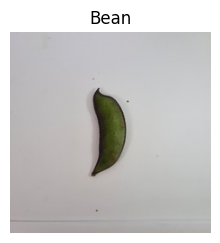

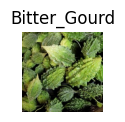

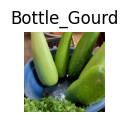

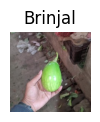

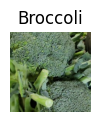

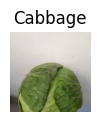

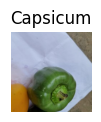

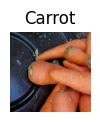

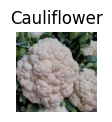

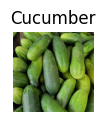

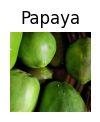

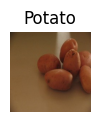

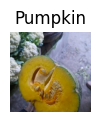

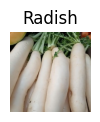

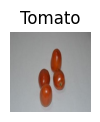

In [5]:
image_categories = os.listdir(r'C:\Users\NARP -10\Desktop\neethuss\AIML\Vegetables\Vegetable Images\train')
def plot_images(image_categories):
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
                # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        plt.show()
      # Call the function
plot_images(image_categories)  

In [6]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set

In [7]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data

In [8]:
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [9]:
# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')
# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [10]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [11]:
#Convolutional Neural Network Model

In [12]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
# Flatten the feature map
model.add(Flatten())
# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [13]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 664s 1s/step - loss: 1.2558 - accuracy: 0.5861 - val_loss: 0.4962 - val_accuracy: 0.8511
Epoch 2/10
468/468 [==============================] - 367s 783ms/step - loss: 0.4678 - accuracy: 0.8518 - val_loss: 0.4013 - val_accuracy: 0.8733
Epoch 3/10
468/468 [==============================] - 336s 719ms/step - loss: 0.2565 - accuracy: 0.9173 - val_loss: 0.2895 - val_accuracy: 0.9136
Epoch 4/10
468/468 [==============================] - 334s 714ms/step - loss: 0.1643 - accuracy: 0.9496 - val_loss: 0.2344 - val_accuracy: 0.9355
Epoch 5/10
468/468 [==============================] - 335s 715ms/step - loss: 0.1249 - accuracy: 0.9580 - val_loss: 0.2512 - val_accuracy: 0.9331
Epoch 6/10
468/468 [==============================] - 348s 743ms/step - loss: 0.0991 - accuracy: 0.9687 - val_loss: 0.2698 - val_accuracy: 0.9308
Epoch 7/10
468/468 [==============================] - 336s 718ms/step - loss: 0.1008 - accuracy: 0.9685 - val_loss: 0.2286 - va

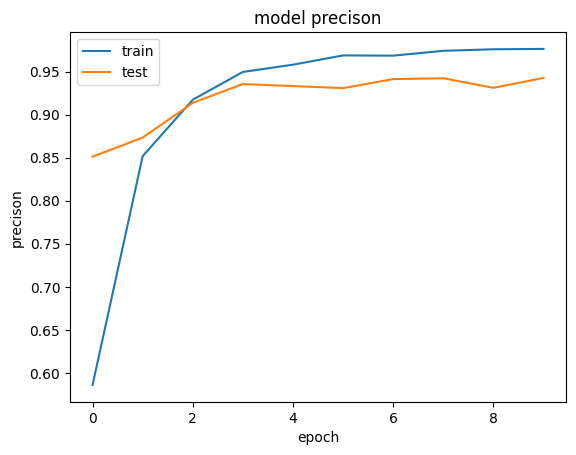

In [14]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model precison')
plt.ylabel('precison')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

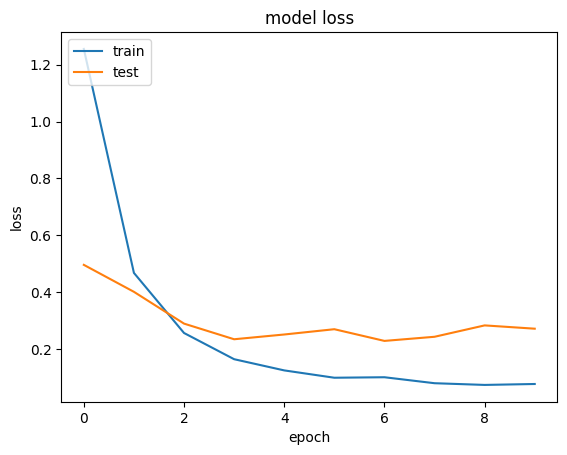

In [15]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#Evaluate Model
model.evaluate(test_image_generator)

94/94 [==============================] - 70s 752ms/step - loss: 0.2667 - accuracy: 0.9413


[0.26665550470352173, 0.9413333535194397]

In [ ]:
#Testing Model

In [46]:
test_image_path = r'C:\Users\NARP -10\Desktop\neethuss\AIML\Vegetables\Vegetable Images\test\Tomato\tomato.jpg'


In [47]:
def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()
    

1/1 [==============================] - 0s 194ms/step


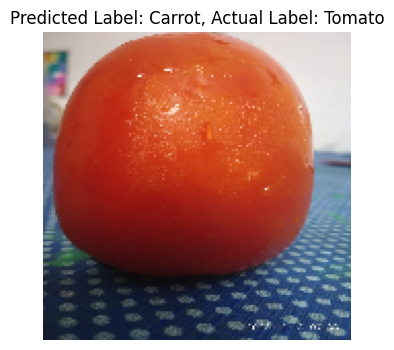

In [48]:
# call the function
generate_predictions(test_image_path, actual_label='Tomato')